In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib notebook

In [2]:
df_creditos = pd.read_csv('df_creditos.csv', index_col = 0, sep = ';')

In [3]:
df_creditos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4228 entries, 0 to 4227
Data columns (total 36 columns):
id_credito                        4228 non-null object
fecha_ingreso                     4228 non-null object
cantidad_cuotas                   4228 non-null int64
monto_credito                     4228 non-null float64
cuota                             4228 non-null float64
total_pagado                      4228 non-null float64
total_gastos                      4228 non-null float64
fecha_vencimiento_ultima_cuota    4228 non-null object
fecha_ultimo_pago                 4228 non-null object
sucursal                          4228 non-null int64
codigo_comercio                   4228 non-null int64
codigo_cliente                    4228 non-null int64
codigo_direccion                  4228 non-null int64
localidad                         4228 non-null int64
codigo_postal                     4228 non-null int64
tipo_propiedad                    4228 non-null object
telefono        

In [4]:
df_creditos.columns

Index(['id_credito', 'fecha_ingreso', 'cantidad_cuotas', 'monto_credito',
       'cuota', 'total_pagado', 'total_gastos',
       'fecha_vencimiento_ultima_cuota', 'fecha_ultimo_pago', 'sucursal',
       'codigo_comercio', 'codigo_cliente', 'codigo_direccion', 'localidad',
       'codigo_postal', 'tipo_propiedad', 'telefono', 'nacionalidad', 'edad',
       'sexo', 'estado_civil', 'cantidad_hijos', 'codigo_empresa', 'seccion',
       'antiguedad_empleo', 'rubro_comercio', 'saldo_credito_hoy',
       'credito_no_vencido_hoy', 'mora_hoy', 'num_cred_cli',
       'cred_no_ven_valor', 'cred_mora_valor', 'cred_cancel_valor',
       'pagado_valor', 'gastos_valor', 'clusters'],
      dtype='object')

In [5]:
df_creditos.head()

,id_credito,fecha_ingreso,cantidad_cuotas,monto_credito,cuota,total_pagado,total_gastos,fecha_vencimiento_ultima_cuota,fecha_ultimo_pago,sucursal,...,saldo_credito_hoy,credito_no_vencido_hoy,mora_hoy,num_cred_cli,cred_no_ven_valor,cred_mora_valor,cred_cancel_valor,pagado_valor,gastos_valor,clusters
0,1981_2,2017-01-02,3,990.0,439.0,1317.00,0.00,2017-04-10,2017-03-07,1,...,0.00,0,0,1,0,0,0,0.00,0.00,3.0
1,888_2,2014-10-20,3,694.0,300.7,902.10,7.52,2015-01-10,2015-01-10,1,...,0.00,0,0,1,0,0,0,0.00,0.00,3.0
2,53_2,2013-10-04,8,1188.0,255.4,1381.62,320.53,2014-09-04,2014-09-04,1,...,406.18,0,1,1,0,0,0,0.00,0.00,3.0
3,57_2,2013-10-07,2,490.0,289.1,578.20,54.93,2013-12-10,2013-12-14,1,...,0.00,0,0,2,1,0,0,1381.62,320.53,3.0
4,205_2,2013-12-30,3,729.0,308.6,925.80,200.59,2014-04-10,2014-05-19,1,...,0.00,0,0,3,1,0,1,1959.82,375.46,3.0


In [6]:
df_creditos ['fecha_ingreso'] = \
       df_creditos['fecha_ingreso'].map(lambda x: pd.Timestamp(x))

In [7]:
mask_mora = df_creditos['mora_hoy'] == 1
df_creditos.loc[mask_mora, 'fecha_ingreso_moroso'] = df_creditos['fecha_ingreso']  
#df_creditos.loc[mask_mora, 'meses_mora_promedio'] = df_creditos.loc[mask_mora, \
 #   'total_meses_mora'] / df_creditos.loc[mask_mora, 'cantidad_cuotas']

In [8]:
df_creditos.loc[2, 'fecha_ingreso']

Timestamp('2013-10-04 00:00:00')

In [9]:
df_creditos.loc[2, 'fecha_ingreso_moroso']

Timestamp('2013-10-04 00:00:00')

In [10]:
df_creditos.sort_values(by = ['fecha_ingreso',
                     'id_credito'], inplace = True )

In [11]:
df_creditos[['fecha_ingreso', 'fecha_ingreso_moroso']].head()

,fecha_ingreso,fecha_ingreso_moroso
3316,2013-06-08,NaT
3077,2013-06-18,NaT
1127,2013-07-12,NaT
4045,2013-08-21,NaT
3485,2013-08-22,NaT


In [12]:
primer_mes = pd.Period (df_creditos['fecha_ingreso'].min(), freq = 'M')
print (primer_mes)
print (primer_mes + 1)

2013-06
2013-07


In [13]:
L = [primer_mes + i for i in np.arange(66)]
L

[Period('2013-06', 'M'),
 Period('2013-07', 'M'),
 Period('2013-08', 'M'),
 Period('2013-09', 'M'),
 Period('2013-10', 'M'),
 Period('2013-11', 'M'),
 Period('2013-12', 'M'),
 Period('2014-01', 'M'),
 Period('2014-02', 'M'),
 Period('2014-03', 'M'),
 Period('2014-04', 'M'),
 Period('2014-05', 'M'),
 Period('2014-06', 'M'),
 Period('2014-07', 'M'),
 Period('2014-08', 'M'),
 Period('2014-09', 'M'),
 Period('2014-10', 'M'),
 Period('2014-11', 'M'),
 Period('2014-12', 'M'),
 Period('2015-01', 'M'),
 Period('2015-02', 'M'),
 Period('2015-03', 'M'),
 Period('2015-04', 'M'),
 Period('2015-05', 'M'),
 Period('2015-06', 'M'),
 Period('2015-07', 'M'),
 Period('2015-08', 'M'),
 Period('2015-09', 'M'),
 Period('2015-10', 'M'),
 Period('2015-11', 'M'),
 Period('2015-12', 'M'),
 Period('2016-01', 'M'),
 Period('2016-02', 'M'),
 Period('2016-03', 'M'),
 Period('2016-04', 'M'),
 Period('2016-05', 'M'),
 Period('2016-06', 'M'),
 Period('2016-07', 'M'),
 Period('2016-08', 'M'),
 Period('2016-09', 'M'),


In [14]:
inicio_primer_mes = primer_mes.to_timestamp()
inicio_primer_mes

Timestamp('2013-06-01 00:00:00')

In [15]:
pd.DateOffset(months = 1)

<DateOffset: months=1>

In [16]:
inicio_primer_mes + pd.DateOffset(months = 1)

Timestamp('2013-07-01 00:00:00')

In [17]:
bin_intervals = [inicio_primer_mes + pd.DateOffset(months = i) for i in np.arange(67)]
bin_intervals

[Timestamp('2013-06-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2013-08-01 00:00:00'),
 Timestamp('2013-09-01 00:00:00'),
 Timestamp('2013-10-01 00:00:00'),
 Timestamp('2013-11-01 00:00:00'),
 Timestamp('2013-12-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-02-01 00:00:00'),
 Timestamp('2014-03-01 00:00:00'),
 Timestamp('2014-04-01 00:00:00'),
 Timestamp('2014-05-01 00:00:00'),
 Timestamp('2014-06-01 00:00:00'),
 Timestamp('2014-07-01 00:00:00'),
 Timestamp('2014-08-01 00:00:00'),
 Timestamp('2014-09-01 00:00:00'),
 Timestamp('2014-10-01 00:00:00'),
 Timestamp('2014-11-01 00:00:00'),
 Timestamp('2014-12-01 00:00:00'),
 Timestamp('2015-01-01 00:00:00'),
 Timestamp('2015-02-01 00:00:00'),
 Timestamp('2015-03-01 00:00:00'),
 Timestamp('2015-04-01 00:00:00'),
 Timestamp('2015-05-01 00:00:00'),
 Timestamp('2015-06-01 00:00:00'),
 Timestamp('2015-07-01 00:00:00'),
 Timestamp('2015-08-01 00:00:00'),
 Timestamp('2015-09-01 00:00:00'),
 Timestamp('2015-10-

In [18]:
mes_fecha_ingreso = pd.cut(df_creditos.loc[:, 'fecha_ingreso'], 
                                        bins=bin_intervals).value_counts(sort = False)
mes_fecha_ingreso = pd.DataFrame(mes_fecha_ingreso)
mes_fecha_ingreso.columns = ['creditos_total']
mes_fecha_ingreso['creditos_mora'] = pd.cut(df_creditos.loc[:, 'fecha_ingreso_moroso'], 
                                        bins=bin_intervals).value_counts(sort = False)
mes_fecha_ingreso.index = L
mes_fecha_ingreso.index.name = 'fecha_ingreso'
mes_fecha_ingreso['mora_sobre_total'] = round(mes_fecha_ingreso['creditos_mora'] \
                                     / mes_fecha_ingreso['creditos_total'] * 100, 1)
mes_fecha_ingreso['mora_promedio'] = round(mes_fecha_ingreso['creditos_mora'].sum() / \
                                     mes_fecha_ingreso['creditos_total'].sum() * 100, 1)

In [19]:
# Generamos una variable con Créditos en Mora acumulados (esto fue para verificar un
# comportamiento inesperado que ya fue resuelto, ahora no se utiliza)
debugging = 0
sum_mora, sum_total = 0, 0
for i in mes_fecha_ingreso.index:
    sum_mora += mes_fecha_ingreso.loc[i,'creditos_mora']
    sum_total += mes_fecha_ingreso.loc[i,'creditos_total']
    mes_fecha_ingreso.loc[i, 'mora_acum'] = round(sum_mora/sum_total * 100 , 1)
    if debugging == 1:
        print('i= {}, Mora = {}, Total = {}, Porcentaje = {}'.format(i, sum_mora,
                                         sum_total, round(sum_mora/sum_total * 100,1)))

In [20]:
mes_fecha_ingreso['mora_sobre_total'].mean()

21.07575757575757

In [21]:
print(df_creditos.loc[:,'mora_hoy'].value_counts(normalize=True))

0    0.788789
1    0.211211
Name: mora_hoy, dtype: float64


In [22]:
mes_fecha_ingreso.head(10)

,creditos_total,creditos_mora,mora_sobre_total,mora_promedio,mora_acum
fecha_ingreso,,,,,
2013-06,2,0,0.0,21.1,0.0
2013-07,1,0,0.0,21.1,0.0
2013-08,8,0,0.0,21.1,0.0
2013-09,38,9,23.7,21.1,18.4
2013-10,43,13,30.2,21.1,23.9
2013-11,49,13,26.5,21.1,24.8
2013-12,70,12,17.1,21.1,22.3
2014-01,66,20,30.3,21.1,24.2
2014-02,64,13,20.3,21.1,23.5


In [23]:
mes_fecha_ingreso.shape

(66, 5)

In [24]:
mes_fecha_ingreso[['creditos_total','creditos_mora']].sum()

creditos_total    4228
creditos_mora      893
dtype: int64

In [25]:
df_creditos['mora_hoy'].sum()

893

In [26]:
# Evaluamos los Créditos no Vencidos
mask_no_vencidos = df_creditos.loc[:,'credito_no_vencido_hoy'] == 1
#df_features = df_features.loc[~mask_no_vencidos,:]

In [27]:
df_mora_vc = df_creditos.loc[mask_no_vencidos,'mora_hoy'].value_counts(normalize=True)
df_mora_vc.index = ['Regular', 'Mora']
df_mora_vc = round(df_mora_vc * 100,1)
df_mora_vc

Regular    58.6
Mora       41.4
Name: mora_hoy, dtype: float64

In [28]:
df_mora_vc.values

array([58.6, 41.4])

In [29]:
mora_no_vencidos = pd.cut(df_creditos.loc[mask_no_vencidos, 'fecha_ingreso_moroso'], 
                                        bins=bin_intervals).value_counts(sort = False)

# VER porque no puedo graficar períodos de fechas

In [30]:
#x = mes_fecha_ingreso.index
x = [ i for i in np.arange(66)]

In [31]:
len(x)

66

<Figure size 432x288 with 0 Axes>

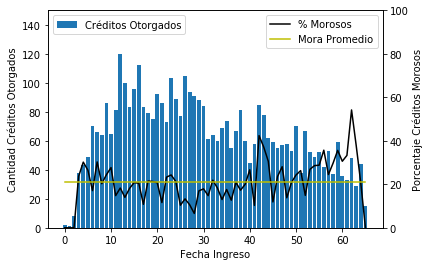

In [32]:

plt.figure(1,figsize=(6, 4))
fig, ax1 = plt.subplots()

plt.bar(x,mes_fecha_ingreso['creditos_total'], label = 'Créditos Otorgados')
plt.ylabel('Cantidad Créditos Otorgados')
plt.xlabel('Fecha Ingreso')
plt.ylim(0, 150)
plt.legend(loc = 2)

ax2 = ax1.twinx()
#plt.plot(x,mes_fecha_ingreso['creditos_mora'], 'ko', label = 'Créditos Morosos')
plt.plot(x,mes_fecha_ingreso['mora_sobre_total'], 'k', lw=1.5, label = '% Morosos')
plt.plot(x,mes_fecha_ingreso['mora_promedio'], 'y-', label = 'Mora Promedio')
#plt.plot(x,mes_fecha_ingreso['mora_acum'], 'y-')
plt.ylim(0, 100)
plt.ylabel('Porcentaje Créditos Morosos')
plt.legend(loc = 1);

#fig.set_size_inches(6, 4.5)
plt.savefig('chart01_creditos_fecha.pdf', bbox_inches='tight', dpi=600)
plt.show();

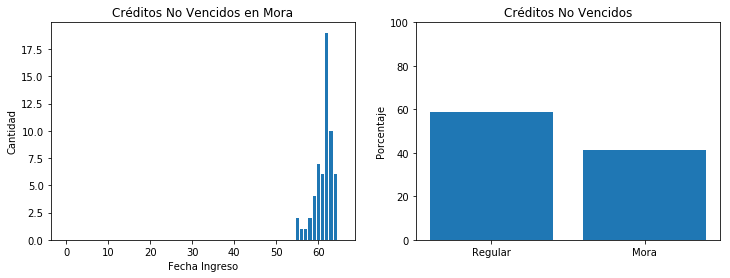

In [33]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(x, mora_no_vencidos, label = 'Créditos Otorgados')
plt.ylabel('Cantidad')
plt.title('Créditos No Vencidos en Mora')
plt.xlabel('Fecha Ingreso')

plt.subplot(122)
plt.bar(df_mora_vc.index, df_mora_vc.values)
plt.ylim(0, 100)
plt.ylabel('Porcentaje')
plt.title('Créditos No Vencidos');
plt.savefig('chart02_no_vencidos_mora.pdf', bbox_inches='tight', dpi=600)
plt.show();

In [34]:
df_creditos.columns

Index(['id_credito', 'fecha_ingreso', 'cantidad_cuotas', 'monto_credito',
       'cuota', 'total_pagado', 'total_gastos',
       'fecha_vencimiento_ultima_cuota', 'fecha_ultimo_pago', 'sucursal',
       'codigo_comercio', 'codigo_cliente', 'codigo_direccion', 'localidad',
       'codigo_postal', 'tipo_propiedad', 'telefono', 'nacionalidad', 'edad',
       'sexo', 'estado_civil', 'cantidad_hijos', 'codigo_empresa', 'seccion',
       'antiguedad_empleo', 'rubro_comercio', 'saldo_credito_hoy',
       'credito_no_vencido_hoy', 'mora_hoy', 'num_cred_cli',
       'cred_no_ven_valor', 'cred_mora_valor', 'cred_cancel_valor',
       'pagado_valor', 'gastos_valor', 'clusters', 'fecha_ingreso_moroso'],
      dtype='object')

In [35]:
x[0]

0

<Figure size 288x432 with 0 Axes>

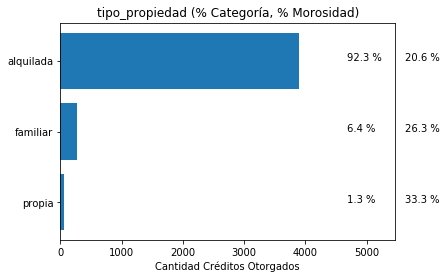

<Figure size 288x432 with 0 Axes>

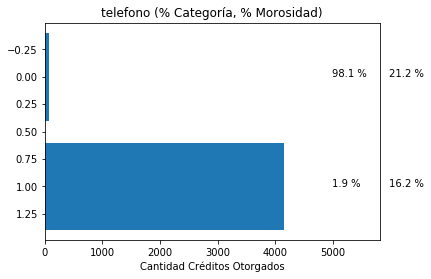

<Figure size 288x432 with 0 Axes>

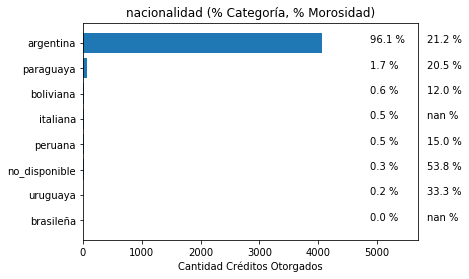

<Figure size 288x432 with 0 Axes>

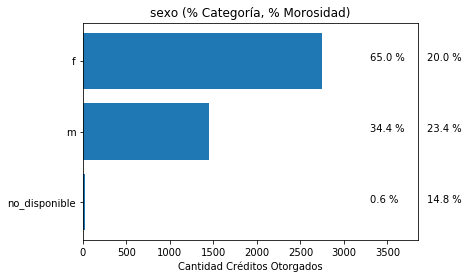

<Figure size 288x432 with 0 Axes>

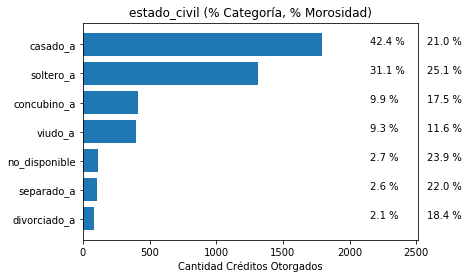

In [36]:
L = ['tipo_propiedad',  'telefono', 'nacionalidad', 'sexo',
    'estado_civil'] # 'localidad','codigo_empresa', 'seccion', 'rubro_comercio']

for i in L:
#i = 'sexo'
#if i == 'sexo':
    categorias_variable = pd.DataFrame(df_creditos[i].value_counts())
    categorias_variable.columns = ['creditos_total'] 
    categorias_variable['creditos_mora'] = df_creditos.loc[mask_mora, i].value_counts()
    categorias_variable['porcentaje_mora'] = round(categorias_variable['creditos_mora']/ \
                          categorias_variable['creditos_total'] * 100, 1 )
    ct = categorias_variable['creditos_total'].sum()
    categorias_variable['porcentaje_categoria'] = round(categorias_variable[
        'creditos_total']/ ct * 100, 1)

    x = categorias_variable.index

    plt.figure(figsize=(4, 6))
    fig, ax1 = plt.subplots()

    plt.barh(x, categorias_variable['creditos_total'], label = 'Créditos Otorgados')
    plt.xlabel('Cantidad Créditos Otorgados')
    plt.xlim(0, categorias_variable['creditos_total'].max(0) * 1.4)
    #plt.legend(loc = 4)
    plt.title(i + ' (% Categoría, % Morosidad)')
    plt.gca().invert_yaxis()

    
    x_pos = categorias_variable.loc[x[0], 'creditos_total'] * 1.2
    for j, v in enumerate(x):
        ax1.text( x_pos, j, \
          str(categorias_variable.loc[v, 'porcentaje_categoria']) + ' %', color='k', \
          horizontalalignment='left'); #fontweight='bold', 
        ax1.text( x_pos*1.2, j, \
          str(categorias_variable.loc[v, 'porcentaje_mora']) + ' %', color='k', \
          horizontalalignment='left'); #fontweight='bold', 
        
    fig.savefig('chart03_' + i + '.pdf', bbox_inches='tight', dpi=600)
    plt.show()

In [37]:
categorias_variable

,creditos_total,creditos_mora,porcentaje_mora,porcentaje_categoria
casado_a,1793,377,21.0,42.4
soltero_a,1314,330,25.1,31.1
concubino_a,417,73,17.5,9.9
viudo_a,395,46,11.6,9.3
no_disponible,113,27,23.9,2.7
separado_a,109,24,22.0,2.6
divorciado_a,87,16,18.4,2.1


In [38]:
categorias_variable.iloc[0:5,0]

casado_a         1793
soltero_a        1314
concubino_a       417
viudo_a           395
no_disponible     113
Name: creditos_total, dtype: int64

<Figure size 288x432 with 0 Axes>

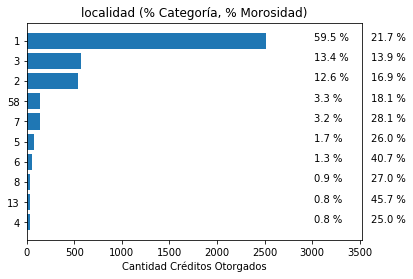

<Figure size 288x432 with 0 Axes>

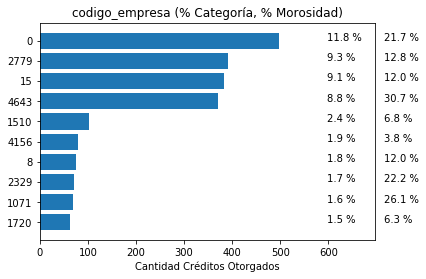

<Figure size 288x432 with 0 Axes>

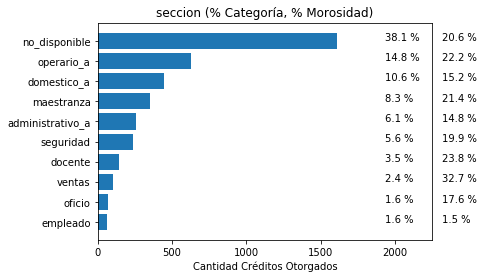

<Figure size 288x432 with 0 Axes>

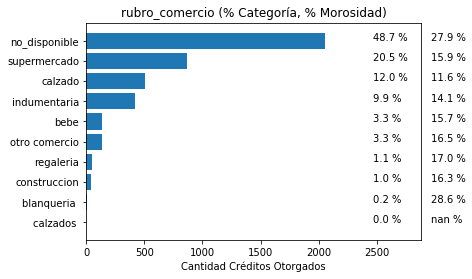

In [39]:
L = ['localidad','codigo_empresa', 'seccion', 'rubro_comercio']
display = 10

for i in L:
#i = 'localidad'
#if i == 'localidad':
    categorias_variable = pd.DataFrame(df_creditos[i].value_counts())
    categorias_variable.columns = ['creditos_total'] 
    categorias_variable['creditos_mora'] = df_creditos.loc[mask_mora, i].value_counts()
    categorias_variable['porcentaje_mora'] = round(categorias_variable['creditos_mora']/ \
                          categorias_variable['creditos_total'] * 100, 1 )
    ct = categorias_variable['creditos_total'].sum()
    categorias_variable['porcentaje_categoria'] = round(categorias_variable[
        'creditos_total']/ ct * 100, 1)
    categorias_variable.index = categorias_variable.index.map(lambda x: str(x))

    x = categorias_variable.index[0:display]

    plt.figure(figsize=(4, 6))
    fig, ax1 = plt.subplots()

    plt.barh(x, categorias_variable.iloc[0:display,0], label = 'Créditos Otorgados')
    plt.xlabel('Cantidad Créditos Otorgados')
    plt.xlim(0, categorias_variable['creditos_total'].max(0) * 1.4)
    #plt.legend(loc = 4)
    plt.title(i + ' (% Categoría, % Morosidad)')
    plt.gca().invert_yaxis()

    
    x_pos = categorias_variable.loc[x[0], 'creditos_total'] * 1.2
    for j, v in enumerate(x):
        ax1.text( x_pos, j, \
          str(categorias_variable.loc[v, 'porcentaje_categoria']) + ' %', color='k', \
          horizontalalignment='left'); #fontweight='bold', 
        ax1.text( x_pos*1.2, j, \
          str(categorias_variable.loc[v, 'porcentaje_mora']) + ' %', color='k', \
          horizontalalignment='left');
   
    fig.savefig('chart04_' + i + '.pdf', bbox_inches='tight', dpi=600)
    plt.show()

In [40]:
df_creditos.loc[mask_mora, ['fecha_ingreso', 'fecha_vencimiento_ultima_cuota', 
            'cantidad_cuotas', 'total_meses_mora', 'meses_mora_promedio', \
            'una_o_mas_cuotas_mora']].\
             sort_values (by = 'meses_mora_promedio', ascending = False).tail(50)

/Users/absmacbookair/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,fecha_ingreso,fecha_vencimiento_ultima_cuota,cantidad_cuotas,total_meses_mora,meses_mora_promedio,una_o_mas_cuotas_mora
2156,2018-07-20,2019-02-10,6,NaN,NaN,NaN
3885,2018-07-23,2019-02-10,6,NaN,NaN,NaN
2596,2018-07-28,2018-10-10,2,NaN,NaN,NaN
2451,2018-07-30,2019-02-10,6,NaN,NaN,NaN
2505,2018-08-03,2018-11-10,3,NaN,NaN,NaN
1724,2018-08-04,2018-12-10,4,NaN,NaN,NaN
2553,2018-08-04,2018-12-10,4,NaN,NaN,NaN
2597,2018-08-07,2018-11-10,4,NaN,NaN,NaN
519,2018-08-09,2019-06-10,10,NaN,NaN,NaN
2922,2018-08-10,2019-02-10,6,NaN,NaN,NaN


In [41]:
bin_intervals = [inicio_primer_mes + pd.DateOffset(months = i) for i in np.arange(67)]
bin_intervals

mes_fecha_ingreso = pd.cut(df_creditos.loc[:, 'fecha_ingreso'], 
                                        bins=bin_intervals).value_counts(sort = False)

/Users/absmacbookair/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


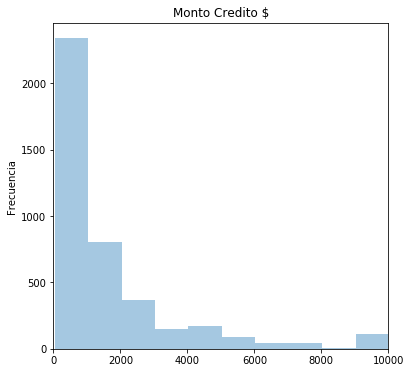

In [42]:
plt.figure(figsize=(6, 6))
sns.distplot(df_creditos['monto_credito'], kde = False)
plt.ylabel('Frecuencia')
plt.title('Monto Credito $')
plt.xlabel('')
plt.xlim(0,10000)
plt.savefig('chart09_credito.pdf', bbox_inches='tight', dpi=600)
plt.show();

/Users/absmacbookair/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


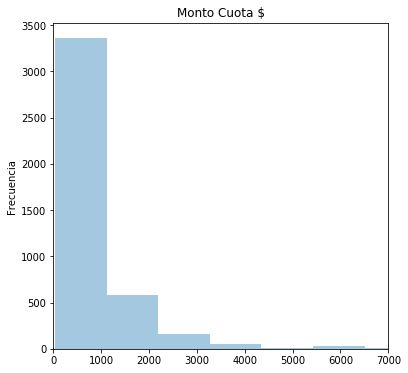

In [43]:
plt.figure(figsize=(6, 6))
sns.distplot(df_creditos['cuota'], kde = False)
plt.ylabel('Frecuencia')
plt.title('Monto Cuota $')
plt.xlabel('')
plt.xlim(0,7000)
plt.savefig('chart09_cuota.pdf', bbox_inches='tight', dpi=600)
plt.show();

/Users/absmacbookair/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


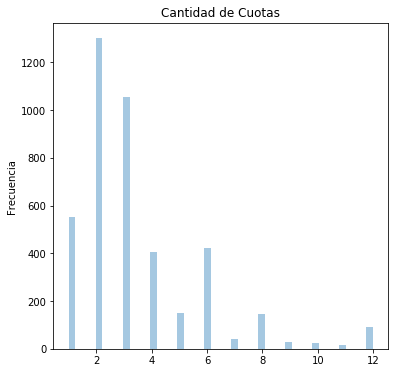

In [44]:
plt.figure(figsize=(6, 6))
sns.distplot(df_creditos['cantidad_cuotas'], kde = False)
plt.ylabel('Frecuencia')
plt.title('Cantidad de Cuotas')
plt.xlabel('')
#plt.xlim(15,90)
plt.savefig('chart09_cantidad_cuotas.pdf', bbox_inches='tight', dpi=600)
plt.show();

/Users/absmacbookair/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


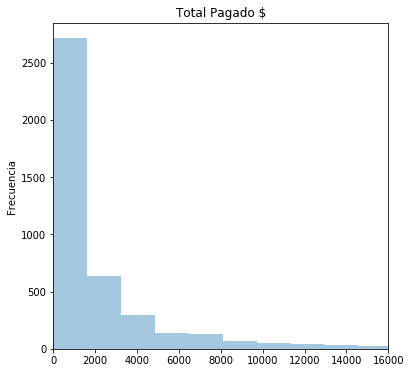

In [45]:
plt.figure(figsize=(6, 6))
sns.distplot(df_creditos['total_pagado'], kde = False)
plt.ylabel('Frecuencia')
plt.title('Total Pagado $')
plt.xlabel('')
plt.xlim(0, 16000)
plt.savefig('chart09_pagado.pdf', bbox_inches='tight', dpi=600)
plt.show();

/Users/absmacbookair/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


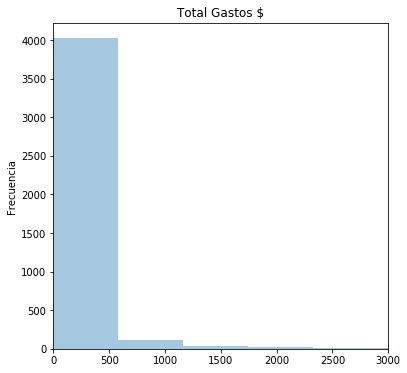

In [46]:
plt.figure(figsize=(6, 6))
sns.distplot(df_creditos['total_gastos'], kde = False)
plt.ylabel('Frecuencia')
plt.title('Total Gastos $')
plt.xlabel('')
plt.xlim(0,3000)
plt.savefig('chart09_gastos.pdf', bbox_inches='tight', dpi=600)
plt.show();

/Users/absmacbookair/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


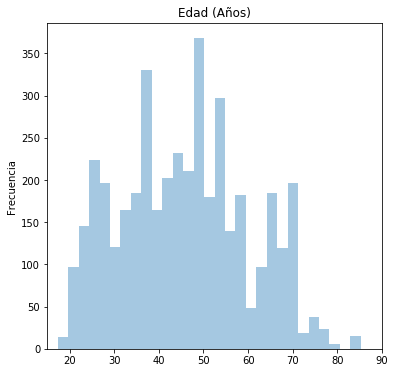

In [47]:
plt.figure(figsize=(6, 6))
sns.distplot(df_creditos['edad'], kde = False)
plt.ylabel('Frecuencia')
plt.title('Edad (Años)')
plt.xlabel('')
plt.xlim(15,90)
plt.savefig('chart09_edad.pdf', bbox_inches='tight', dpi=600)
plt.show();

/Users/absmacbookair/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


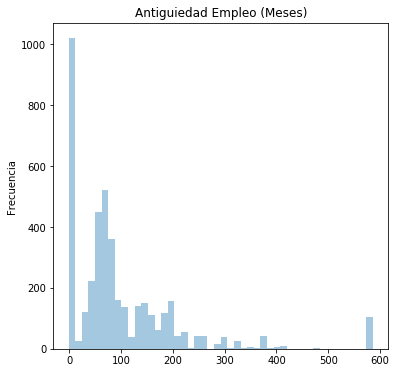

In [48]:
plt.figure(figsize=(6, 6))
sns.distplot(df_creditos['antiguedad_empleo'], kde = False)
plt.ylabel('Frecuencia')
plt.title('Antiguiedad Empleo (Meses)')
plt.xlabel('')
#plt.xlim(15,90)
plt.savefig('chart09_antiguedad.pdf', bbox_inches='tight', dpi=600)
plt.show();

/Users/absmacbookair/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


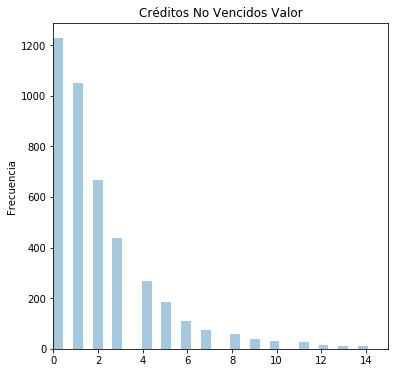

In [49]:
plt.figure(figsize=(6, 6))
sns.distplot(df_creditos['cred_no_ven_valor'], kde = False)
plt.ylabel('Frecuencia')
plt.title('Créditos No Vencidos Valor')
plt.xlabel('')
plt.xlim(0,15)
plt.savefig('chart09_cred_no_ven_valor.pdf', bbox_inches='tight', dpi=600)
plt.show();

/Users/absmacbookair/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


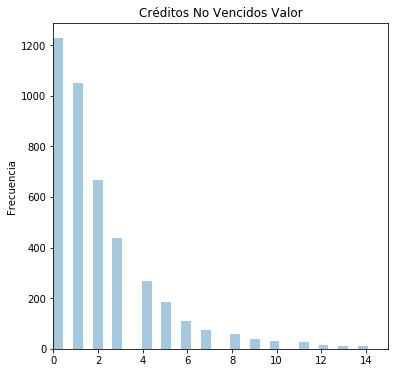

In [50]:
plt.figure(figsize=(6, 6))
sns.distplot(df_creditos['cred_no_ven_valor'], kde = False)
plt.ylabel('Frecuencia')
plt.title('Créditos No Vencidos Valor')
plt.xlabel('')
plt.xlim(0,15)
plt.savefig('chart09_cred_no_ven_valor.pdf', bbox_inches='tight', dpi=600)
plt.show();

/Users/absmacbookair/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


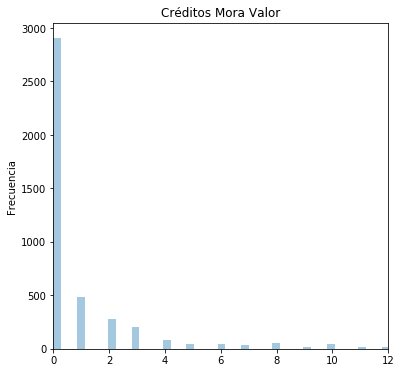

In [51]:
plt.figure(figsize=(6, 6))
sns.distplot(df_creditos['cred_mora_valor'], kde = False)
plt.ylabel('Frecuencia')
plt.title('Créditos Mora Valor')
plt.xlabel('')
plt.xlim(0,12)
plt.savefig('chart09_cred_mora_valor.pdf', bbox_inches='tight', dpi=600)
plt.show();

/Users/absmacbookair/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


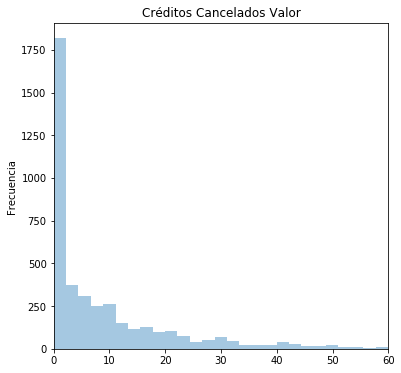

In [52]:
plt.figure(figsize=(6, 6))
sns.distplot(df_creditos['cred_cancel_valor'], kde = False)
plt.ylabel('Frecuencia')
plt.title('Créditos Cancelados Valor')
plt.xlabel('')
plt.xlim(0,60)
plt.savefig('chart09_cred_cancel_valor.pdf', bbox_inches='tight', dpi=600)
plt.show();

In [53]:
df_creditos.columns

Index(['id_credito', 'fecha_ingreso', 'cantidad_cuotas', 'monto_credito',
       'cuota', 'total_pagado', 'total_gastos',
       'fecha_vencimiento_ultima_cuota', 'fecha_ultimo_pago', 'sucursal',
       'codigo_comercio', 'codigo_cliente', 'codigo_direccion', 'localidad',
       'codigo_postal', 'tipo_propiedad', 'telefono', 'nacionalidad', 'edad',
       'sexo', 'estado_civil', 'cantidad_hijos', 'codigo_empresa', 'seccion',
       'antiguedad_empleo', 'rubro_comercio', 'saldo_credito_hoy',
       'credito_no_vencido_hoy', 'mora_hoy', 'num_cred_cli',
       'cred_no_ven_valor', 'cred_mora_valor', 'cred_cancel_valor',
       'pagado_valor', 'gastos_valor', 'clusters', 'fecha_ingreso_moroso'],
      dtype='object')

In [54]:
L = ['sucursal',
       'codigo_comercio', 'codigo_cliente', 'codigo_direccion', 'localidad',
       'codigo_postal', 'tipo_propiedad', 'telefono', 'nacionalidad', 'edad',
       'sexo', 'estado_civil', 'cantidad_hijos', 'codigo_empresa', 'seccion',
       'antiguedad_empleo', 'rubro_comercio','saldo_credito_hoy',
       'credito_no_vencido_hoy', 'mora_hoy', 'num_cred_cli',
       'cred_no_ven_valor', 'cred_mora_valor', 'cred_cancel_valor',
       'pagado_valor', 'gastos_valor', 'fecha_ingreso_moroso']
for i in L:
    print (i)
    print (df_creditos[i].value_counts())
    print('\n')

sucursal
1    4228
Name: sucursal, dtype: int64


codigo_comercio
 1       1232
 561      654
 8        401
-1        342
 298      241
 7        119
 129       84
 47        81
 57        74
 771       72
 809       59
 27        58
 17        50
 518       47
 24        46
 25        45
 231       29
 115       29
 473       28
 160       24
 116       22
 40        22
 49        21
 388       20
 475       20
 21        20
 808       19
 69        17
 20        16
 122       16
         ... 
 120        3
 619        3
 664        3
 33         3
 13         3
 461        3
 6          3
 46         3
 811        3
 18         2
 14         2
 431        2
 119        2
 107        2
 110        2
 124        2
 30         2
 11         2
 29         1
 674        1
 22         1
 108        1
 360        1
 43         1
 5000       1
 28         1
 813        1
 641        1
 816        1
 3          1
Name: codigo_comercio, Length: 94, dtype: int64


codigo_cliente
169    121
266 

In [55]:
L = ['rubro_comercio', 'localidad', 'codigo_postal', 'nacionalidad']
for i in L:
    print('Cantidad Categorías en {} = {}'.format(i, len(df_creditos[i].value_counts())))

Cantidad Categorías en rubro_comercio = 10
Cantidad Categorías en localidad = 30
Cantidad Categorías en codigo_postal = 26
Cantidad Categorías en nacionalidad = 8


In [56]:
df_creditos.columns

Index(['id_credito', 'fecha_ingreso', 'cantidad_cuotas', 'monto_credito',
       'cuota', 'total_pagado', 'total_gastos',
       'fecha_vencimiento_ultima_cuota', 'fecha_ultimo_pago', 'sucursal',
       'codigo_comercio', 'codigo_cliente', 'codigo_direccion', 'localidad',
       'codigo_postal', 'tipo_propiedad', 'telefono', 'nacionalidad', 'edad',
       'sexo', 'estado_civil', 'cantidad_hijos', 'codigo_empresa', 'seccion',
       'antiguedad_empleo', 'rubro_comercio', 'saldo_credito_hoy',
       'credito_no_vencido_hoy', 'mora_hoy', 'num_cred_cli',
       'cred_no_ven_valor', 'cred_mora_valor', 'cred_cancel_valor',
       'pagado_valor', 'gastos_valor', 'clusters', 'fecha_ingreso_moroso'],
      dtype='object')

In [72]:
L = ['cantidad_cuotas', 'monto_credito', 'cuota', 'edad', 'antiguedad_empleo', 
     'total_pagado', 'total_gastos', 'mora_hoy', 'num_cred_cli',
       'cred_no_ven_valor', 'cred_mora_valor', 'cred_cancel_valor',
       'pagado_valor', 'gastos_valor']

In [73]:
df_corr = df_creditos[L].corr()
df_corr

,cantidad_cuotas,monto_credito,cuota,edad,antiguedad_empleo,total_pagado,total_gastos,mora_hoy,num_cred_cli,cred_no_ven_valor,cred_mora_valor,cred_cancel_valor,pagado_valor,gastos_valor
cantidad_cuotas,1.000000,0.481433,0.114806,-0.006108,0.043319,0.528733,0.287973,0.300375,-0.169048,-0.199981,-0.080460,-0.147700,0.043308,0.031223
monto_credito,0.481433,1.000000,0.778593,-0.044331,-0.038396,0.817441,0.374415,0.234638,-0.058154,-0.160886,0.089464,-0.051164,0.409344,0.207388
cuota,0.114806,0.778593,1.000000,-0.043753,-0.065144,0.526754,0.163199,0.108733,-0.007443,-0.110189,0.092794,-0.002491,0.391259,0.142916
edad,-0.006108,-0.044331,-0.043753,1.000000,0.247389,-0.032244,-0.041945,-0.069703,0.219943,0.114442,0.000557,0.230663,0.083862,0.002784
antiguedad_empleo,0.043319,-0.038396,-0.065144,0.247389,1.000000,0.000041,0.029329,-0.029433,0.250527,0.228642,-0.054072,0.253629,0.173934,0.138399
total_pagado,0.528733,0.817441,0.526754,-0.032244,0.000041,1.000000,0.457116,0.123992,-0.077187,-0.171708,0.049314,-0.065561,0.273405,0.148897
total_gastos,0.287973,0.374415,0.163199,-0.041945,0.029329,0.457116,1.000000,0.216300,-0.062302,-0.080480,0.002433,-0.057626,0.078831,0.261009
mora_hoy,0.300375,0.234638,0.108733,-0.069703,-0.029433,0.123992,0.216300,1.000000,-0.052568,-0.052437,0.053611,-0.058172,0.066120,0.141656
num_cred_cli,-0.169048,-0.058154,-0.007443,0.219943,0.250527,-0.077187,-0.062302,-0.052568,1.000000,0.489935,0.524983,0.983361,0.583055,0.288126
cred_no_ven_valor,-0.199981,-0.160886,-0.110189,0.114442,0.228642,-0.171708,-0.080480,-0.052437,0.489935,1.000000,0.222624,0.358965,0.277108,0.073211


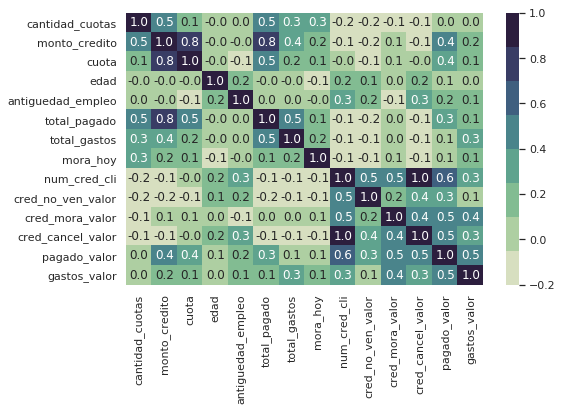

In [74]:
plt.figure(figsize=(8, 5))
sns.set()
sns.heatmap(df_corr,annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.savefig('chart05_correlacion.pdf', bbox_inches='tight', dpi=600)
plt.show()

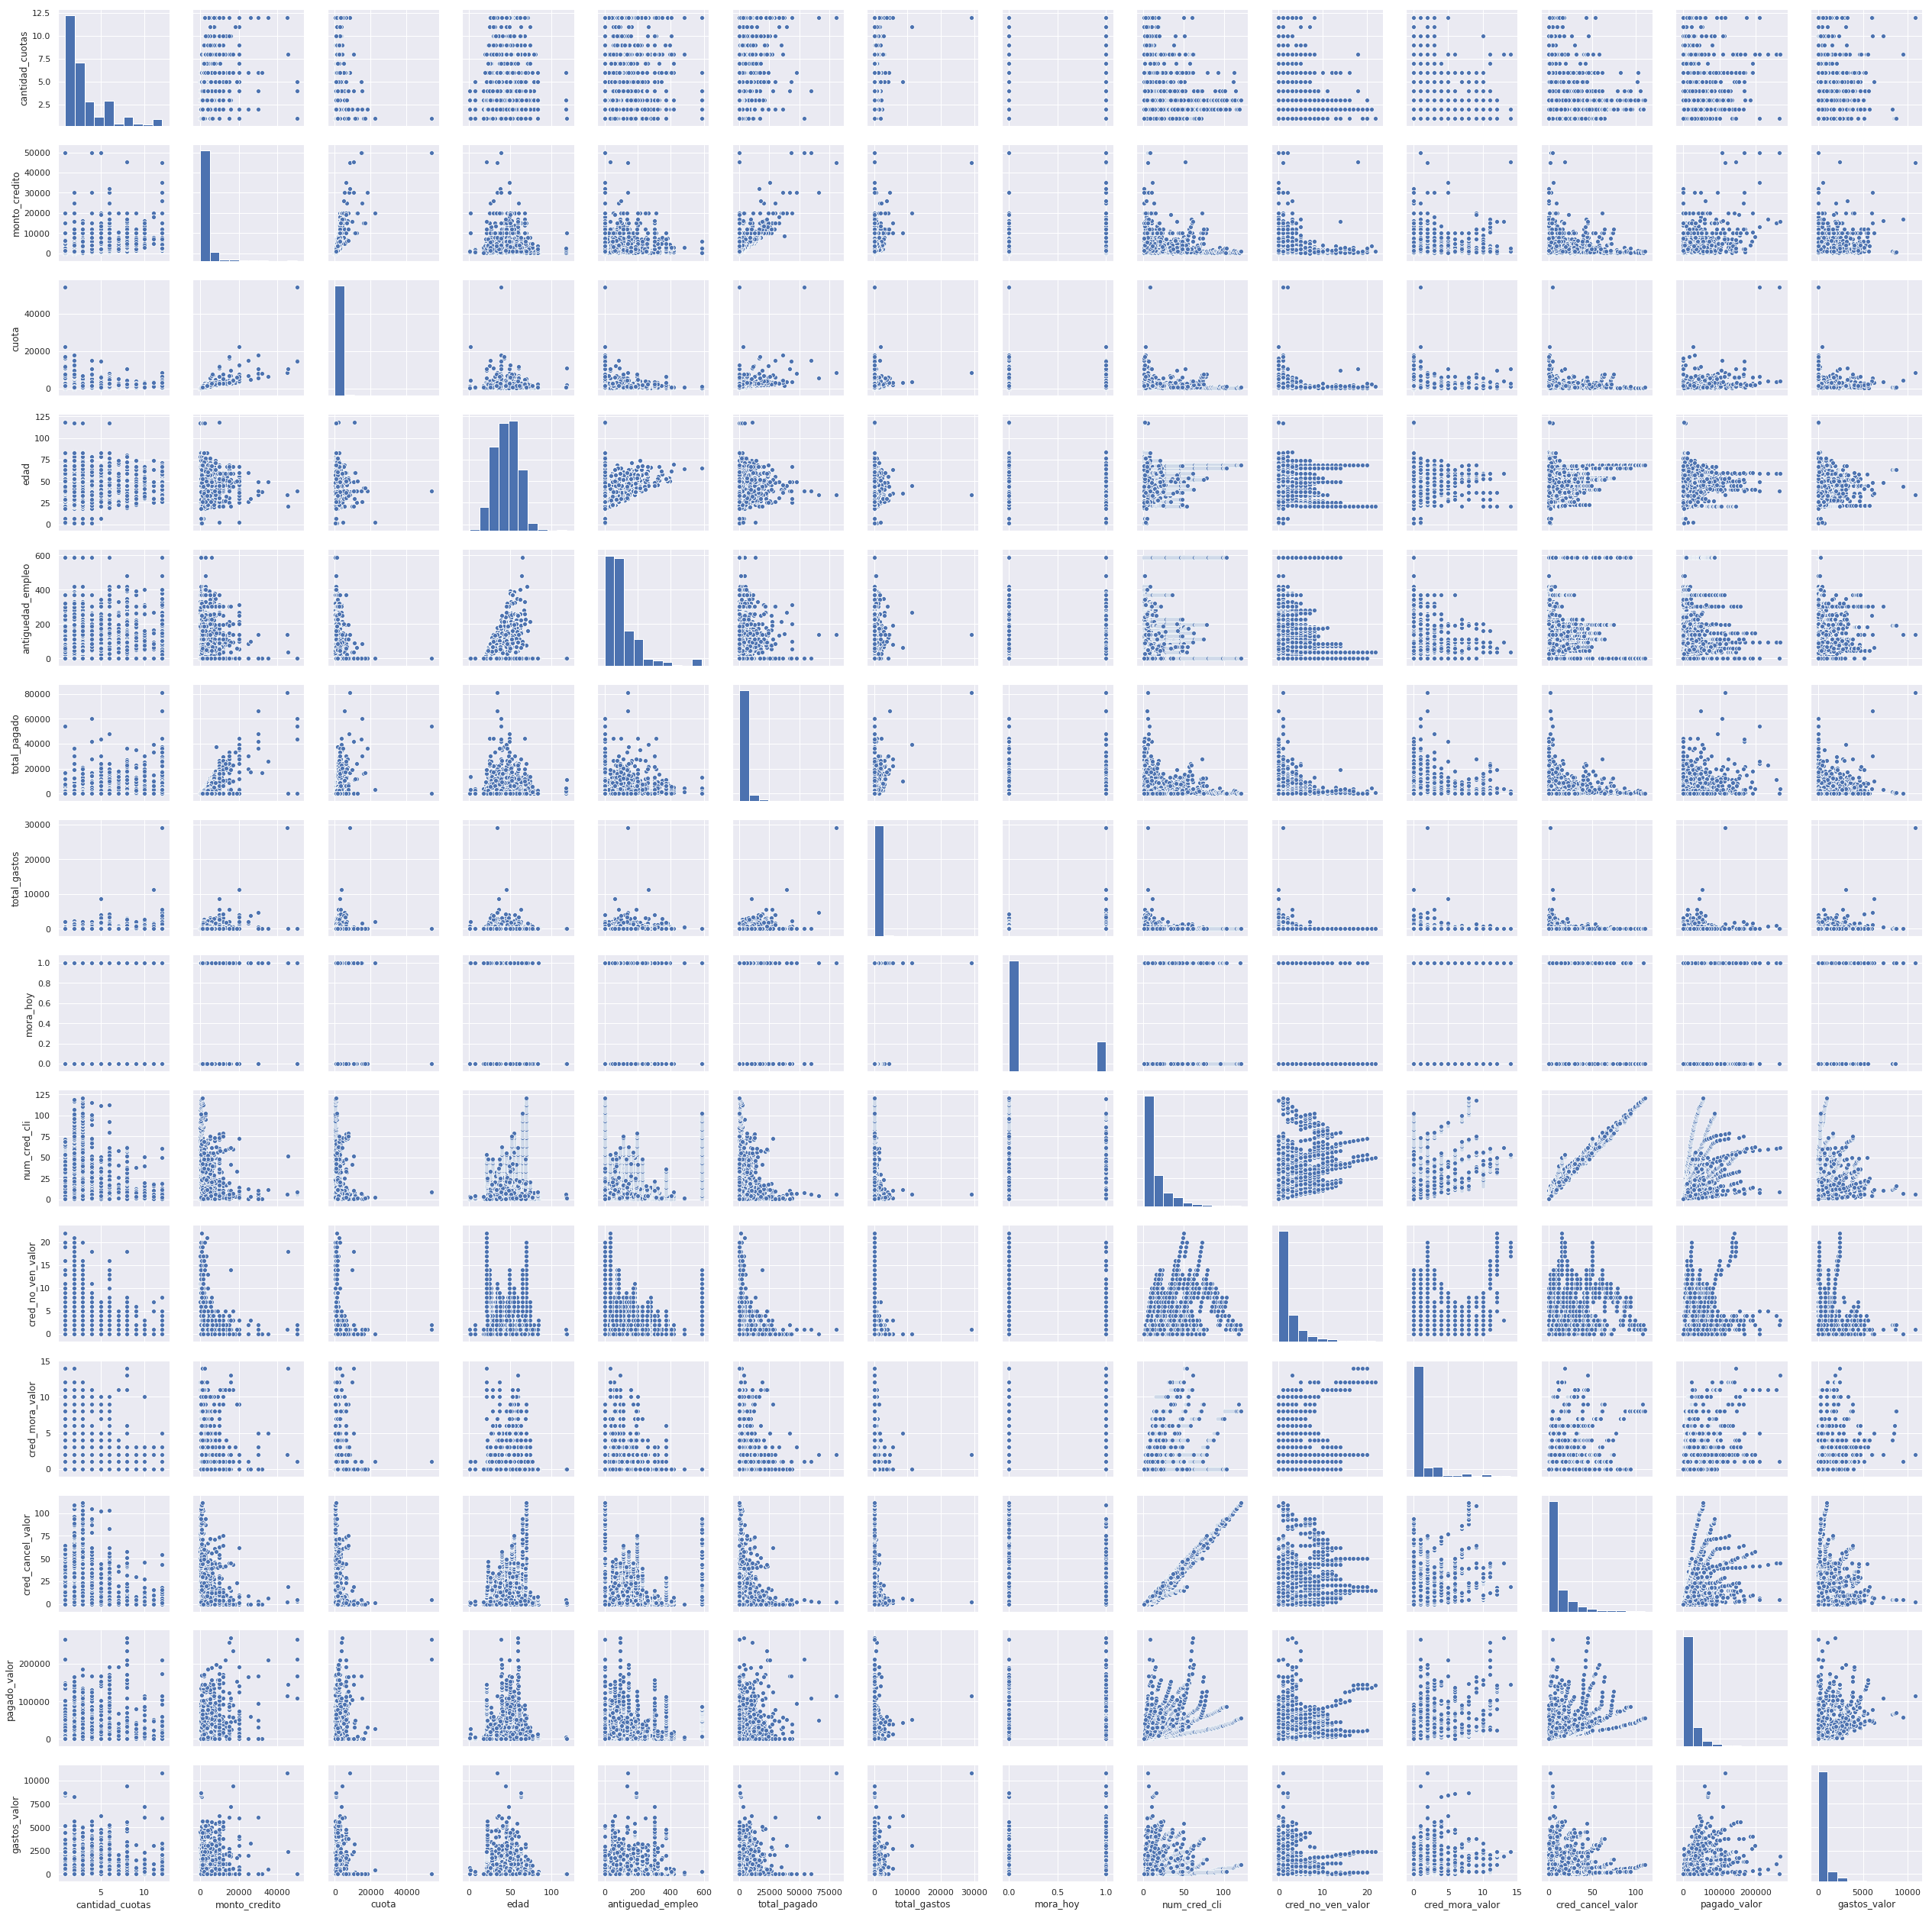

In [60]:
sns.pairplot(df_creditos[L]);
plt.savefig('chart06_pairplot.pdf', bbox_inches='tight', dpi=600)

In [61]:
mask_comercio_1 = 0
mask_comercio_1 = df_creditos.loc[:,'codigo_comercio'] == 1
df_creditos['comercio_1'] = 0
df_creditos.loc[mask_comercio_1, 'comercio_1'] = 1
mask_comercio_1.sum()

1232

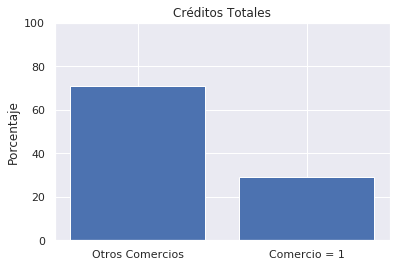

In [62]:
df_mora_vc = df_creditos.loc[:,'comercio_1'].value_counts(normalize=True)
df_mora_vc.index = ['Otros Comercios', 'Comercio = 1']
df_mora_vc = round(df_mora_vc * 100,1)
df_mora_vc

plt.figure(figsize=(6, 4))

plt.bar(df_mora_vc.index, df_mora_vc.values)
plt.ylim(0, 100)
plt.ylabel('Porcentaje')
plt.title('Créditos Totales');
plt.savefig('chart07_comercio_1.pdf', bbox_inches='tight', dpi=600)
plt.show()

In [63]:
df_mora_vc

Otros Comercios    70.9
Comercio = 1       29.1
Name: comercio_1, dtype: float64

In [64]:
print ('Comercio = 1 - Monto Crédito')
print('Media = {}'.format(df_creditos.loc[mask_comercio_1, 'monto_credito']. mean()))
print('Rango = [{}, {}]'.format(df_creditos.loc[mask_comercio_1, 'monto_credito']. min(),
                               df_creditos.loc[mask_comercio_1, 'monto_credito']. max()))      

print('\n')
print ('Resto Comercios - Monto Crédito')
print('Media = {}'.format(df_creditos.loc[~mask_comercio_1, 'monto_credito']. mean()))
print('Rango = [{}, {}]'.format(df_creditos.loc[~mask_comercio_1, 'monto_credito']. min(),
                               df_creditos.loc[~mask_comercio_1, 'monto_credito']. max()))      

Comercio = 1 - Monto Crédito
Media = 4411.986201298701
Rango = [200.0, 50000.0]


Resto Comercios - Monto Crédito
Media = 1238.3238050734312
Rango = [34.0, 50000.0]


In [65]:
df_creditos.loc[~mask_comercio_1, 'monto_credito']. mean()

1238.3238050734312

In [66]:
L = ['cantidad_cuotas', 'monto_credito', 'num_cred_cli']

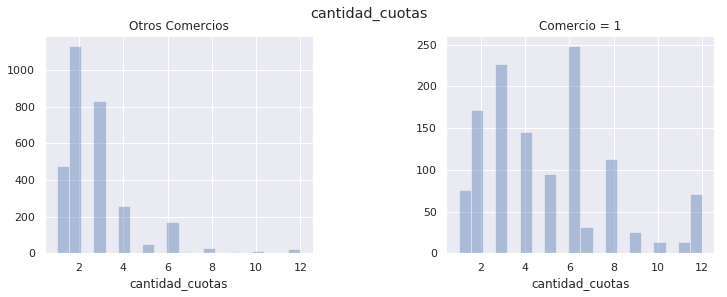

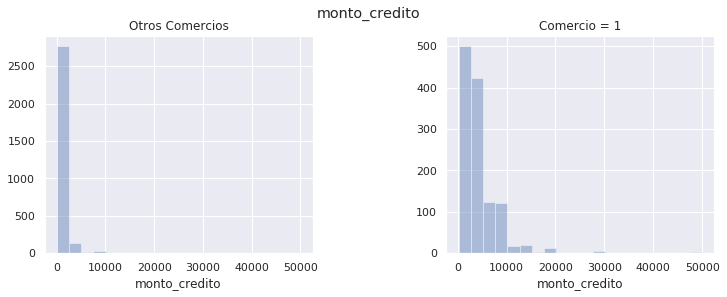

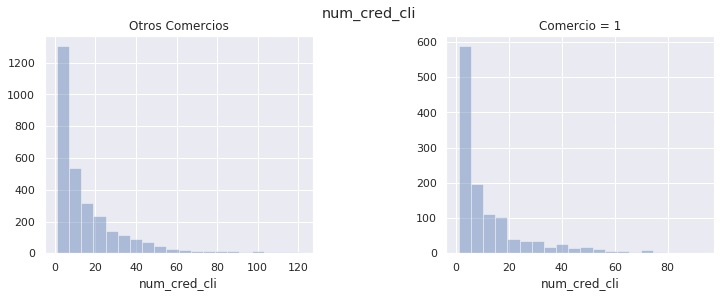

In [67]:
for i in L:
#i = 'cantidad_cuotas'
#if i == 'cantidad_cuotas':
    #plt.figure(figsize=(12, 12))
    sns.set(rc={'figure.figsize':(12,4)})
    fig, ax1 = plt.subplots()
    
    fig.suptitle(i) #, fontsize=16)
    
    plt.subplot(121)
    plt.title('Otros Comercios')
    #plt.ylim(0,df_creditos.loc[~mask_comercio_1, i].max()*1.2)
    sns.distplot(df_creditos.loc[~mask_comercio_1, i], bins=20, kde=False)

    plt.subplots_adjust(wspace=0.5)

    plt.subplot(122)
    plt.title('Comercio = 1')
    #plt.ylim(0,df_creditos.loc[~mask_comercio_1, i].max()*1.2)
    sns.distplot(df_creditos.loc[mask_comercio_1, i], bins=20, kde=False)
    
    plt.savefig('chart08_comer1_' + i + '.pdf', bbox_inches='tight', dpi=600)
    plt.show()

### Parámetros para Función de Costos

In [68]:
df_creditos.columns

Index(['id_credito', 'fecha_ingreso', 'cantidad_cuotas', 'monto_credito',
       'cuota', 'total_pagado', 'total_gastos',
       'fecha_vencimiento_ultima_cuota', 'fecha_ultimo_pago', 'sucursal',
       'codigo_comercio', 'codigo_cliente', 'codigo_direccion', 'localidad',
       'codigo_postal', 'tipo_propiedad', 'telefono', 'nacionalidad', 'edad',
       'sexo', 'estado_civil', 'cantidad_hijos', 'codigo_empresa', 'seccion',
       'antiguedad_empleo', 'rubro_comercio', 'saldo_credito_hoy',
       'credito_no_vencido_hoy', 'mora_hoy', 'num_cred_cli',
       'cred_no_ven_valor', 'cred_mora_valor', 'cred_cancel_valor',
       'pagado_valor', 'gastos_valor', 'clusters', 'fecha_ingreso_moroso',
       'comercio_1'],
      dtype='object')

In [69]:
media_creditos = df_creditos['monto_credito'].mean()
media_cuotas = df_creditos['cuota'].mean() * df_creditos['cantidad_cuotas'].mean()
media_intereses =  media_cuotas - media_creditos
print('Capital = {0:.0f}, ({1:.1f}%)'.format(media_creditos, media_creditos/media_cuotas*100))
print('Costo Mora (capital + intereses) = {0:.0f}, (100%)'.format(media_cuotas))
print('Negocio Perdido (intereses) = {0:.0f}, ({1:.1f}%)'.format(media_intereses, 
                                                media_intereses / media_cuotas * 100))

Capital = 2163, (75.1%)
Costo Mora (capital + intereses) = 2882, (100%)
Negocio Perdido (intereses) = 719, (24.9%)
